## SECTION 1: EXPLORATORY DATA ANALYSIS (EDA)

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = pd.read_csv('/content/drive/MyDrive/ML project/Cleaned_dataset.csv')

In [69]:
df = data.copy()

In [70]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [71]:
def basic_analysis(dataframe):
    print('SHAPE'.center(50,'-'))
    print(df.shape)
    print('DATA TYPES'.center(50,'-'))
    print(df.dtypes)
    print('NO OF NULL VALUES IN EACH COLUMNS'.center(50,'-'))
    print(df.isnull().sum())
    print('NO OF DUPLICATES'.center(50,'-'))
    print(df.duplicated().sum())
    print('NUMBER OF UNIQUE VALUES IN EACH COLUMNS'.center(50,'-'))
    print(df.nunique())

In [72]:
basic_analysis(df)

----------------------SHAPE-----------------------
(452088, 13)
--------------------DATA TYPES--------------------
Date_of_journey       object
Journey_day           object
Airline               object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object
--------NO OF NULL VALUES IN EACH COLUMNS---------
Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64
-----------------NO OF DUPLICATES-----------------
6722
-----NUMBER OF UNIQUE VALUES IN EACH COLUMNS------
Date_of_journey         

In [73]:
df[df.duplicated()]

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
19211,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117
19321,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,31.5833,1,20084
19323,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,33.5000,1,20084
19633,2023-01-17,Tuesday,Vistara,UK-929,Economy,Delhi,After 6 PM,2+-stop,After 6 PM,Bangalore,21.9167,2,15473
19670,2023-01-17,Tuesday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,2,15196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451999,2023-03-06,Monday,Air India,AI-482,Economy,Ahmedabad,12 PM - 6 PM,1-stop,Before 6 AM,Chennai,10.4167,50,11646
452010,2023-03-06,Monday,Vistara,UK-918,Economy,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,15856
452011,2023-03-06,Monday,Vistara,UK-918,Economy,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,15856
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254


In [74]:
df.isnull().sum()

,0
Date_of_journey,0
Journey_day,0
Airline,0
Flight_code,0
Class,0
Source,0
Departure,0
Total_stops,0
Arrival,0
Destination,0


In [75]:
cat = df.select_dtypes(include='object')
cat

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai
...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai


In [76]:
num = df.select_dtypes(exclude='object')
num

,Duration_in_hours,Days_left,Fare
0,2.0833,1,5335
1,2.3333,1,5899
2,2.1667,1,5801
3,2.0833,1,5794
4,2.1667,1,5955
...,...,...,...
452083,13.0833,50,65028
452084,11.2500,50,69254
452085,11.2500,50,69254
452086,11.1667,50,72980


In [77]:
num.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [78]:
cat.describe()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination
count,452088,452088,452088,452088,452088,452088,452088,452088,452088,452088
unique,50,7,9,1405,4,7,4,3,4,7
top,2023-01-31,Monday,Vistara,UK-936,Economy,Delhi,6 AM - 12 PM,1-stop,After 6 PM,Mumbai
freq,9824,72220,231490,5506,252033,83153,184980,369650,200266,82995


In [79]:
for i in cat:
  print(df[i].value_counts())
  print('----------')

Date_of_journey
2023-01-31    9824
2023-02-14    9523
2023-02-15    9510
2023-03-02    9433
2023-01-27    9414
2023-02-09    9381
2023-02-18    9374
2023-02-03    9354
2023-03-01    9342
2023-02-13    9331
2023-01-26    9325
2023-02-05    9321
2023-02-12    9277
2023-02-24    9273
2023-02-08    9264
2023-02-10    9239
2023-02-01    9234
2023-03-06    9222
2023-02-16    9210
2023-01-29    9162
2023-02-20    9162
2023-02-23    9112
2023-01-30    9103
2023-01-25    9066
2023-02-07    9052
2023-02-21    9043
2023-02-27    9042
2023-01-28    9028
2023-02-28    9017
2023-02-04    9012
2023-02-26    9009
2023-02-25    9001
2023-02-06    8980
2023-02-02    8971
2023-03-03    8904
2023-01-23    8898
2023-01-20    8891
2023-02-11    8867
2023-02-17    8857
2023-01-24    8786
2023-01-19    8755
2023-02-22    8708
2023-03-04    8627
2023-01-21    8608
2023-03-05    8584
2023-01-18    8556
2023-01-16    8482
2023-02-19    8461
2023-01-22    8336
2023-01-17    8157
Name: count, dtype: int64
--------

In [80]:
df.groupby('Airline')['Class'].unique()

,Class
Airline,
Air India,"[Economy, Business, First]"
AirAsia,[Economy]
AkasaAir,[Economy]
AllianceAir,[Economy]
GO FIRST,[Economy]
Indigo,[Economy]
SpiceJet,[Economy]
StarAir,[Economy]
Vistara,"[Economy, Premium Economy, Business]"


In [81]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

In [82]:
df['Date'] = df['Date_of_journey'].dt.day
df['Month'] = df['Date_of_journey'].dt.month
display(df[['Date_of_journey', 'Date', 'Month']].head())

,Date_of_journey,Date,Month
0,2023-01-16,16,1
1,2023-01-16,16,1
2,2023-01-16,16,1
3,2023-01-16,16,1
4,2023-01-16,16,1


In [83]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Date', 'Month'],
      dtype='object')

In [84]:
df.shape

(452088, 15)

In [85]:
num.skew()

,0
Duration_in_hours,0.656816
Days_left,-0.002647
Fare,1.334754


In [86]:
"""Checking for the classes provided by the airline"""

'Checking for the classes provided by the airline'

In [87]:
df.groupby('Airline')['Class'].unique()

,Class
Airline,
Air India,"[Economy, Business, First]"
AirAsia,[Economy]
AkasaAir,[Economy]
AllianceAir,[Economy]
GO FIRST,[Economy]
Indigo,[Economy]
SpiceJet,[Economy]
StarAir,[Economy]
Vistara,"[Economy, Premium Economy, Business]"


In [88]:
"""Month with max average fare"""

'Month with max average fare'

In [89]:
df.groupby('Month')['Fare'].mean().round(2)

,Fare
Month,
1,25394.33
2,21814.99
3,20960.77


Using Top 10 method on Flight_code and Date_of_journey to make it more presentable in EDA plots

In [90]:
df['Flight_code_top10'] = df['Flight_code'].where(df['Flight_code'].isin(df['Flight_code'].value_counts().head(10).index), 'Others')

In [91]:
df['Flight_code_top10'].value_counts()

,count
Flight_code_top10,
Others,406810
UK-936,5506
UK-918,5349
UK-706,5243
UK-926,4551
UK-832,4516
UK-720,4412
UK-822,4203
UK-946,3924


In [92]:
df['Journey_date_top10'] = df['Date_of_journey'].where(df['Date_of_journey'].isin(df['Date_of_journey'].value_counts().head(10).index), 'Others')

In [93]:
df['Journey_date_top10'].value_counts()

,count
Journey_date_top10,
Others,357602
2023-01-31 00:00:00,9824
2023-02-14 00:00:00,9523
2023-02-15 00:00:00,9510
2023-03-02 00:00:00,9433
2023-01-27 00:00:00,9414
2023-02-09 00:00:00,9381
2023-02-18 00:00:00,9374
2023-02-03 00:00:00,9354


Uni-Variate Analysis

Numeric columns

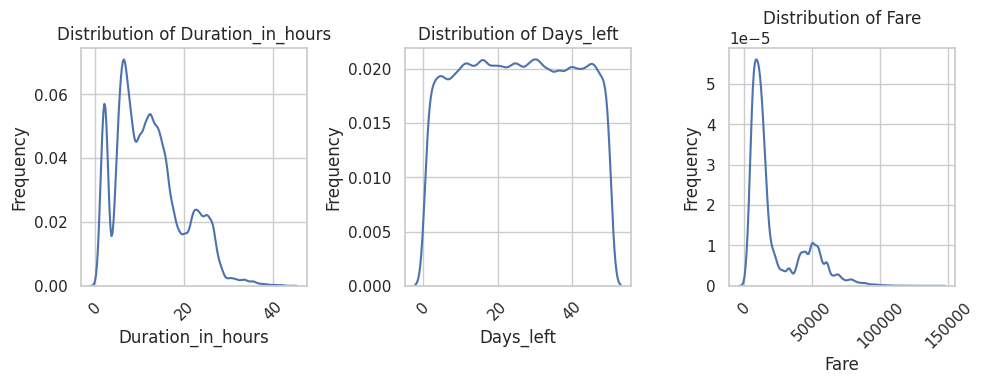

In [94]:
plt.figure(figsize=(10,10))
t=1
for i in num:
  plt.subplot(3,3,t)
  plt.title(f'Distribution of {i}')
  sns.kdeplot(df[i])
  plt.xticks(rotation=45)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  t+=1
plt.tight_layout()
plt.show()

Categorical columns

In [95]:
cat.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination'],
      dtype='object')

In [96]:
cat2 = ['Journey_day', 'Airline', 'Flight_code_top10','Journey_date_top10', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']

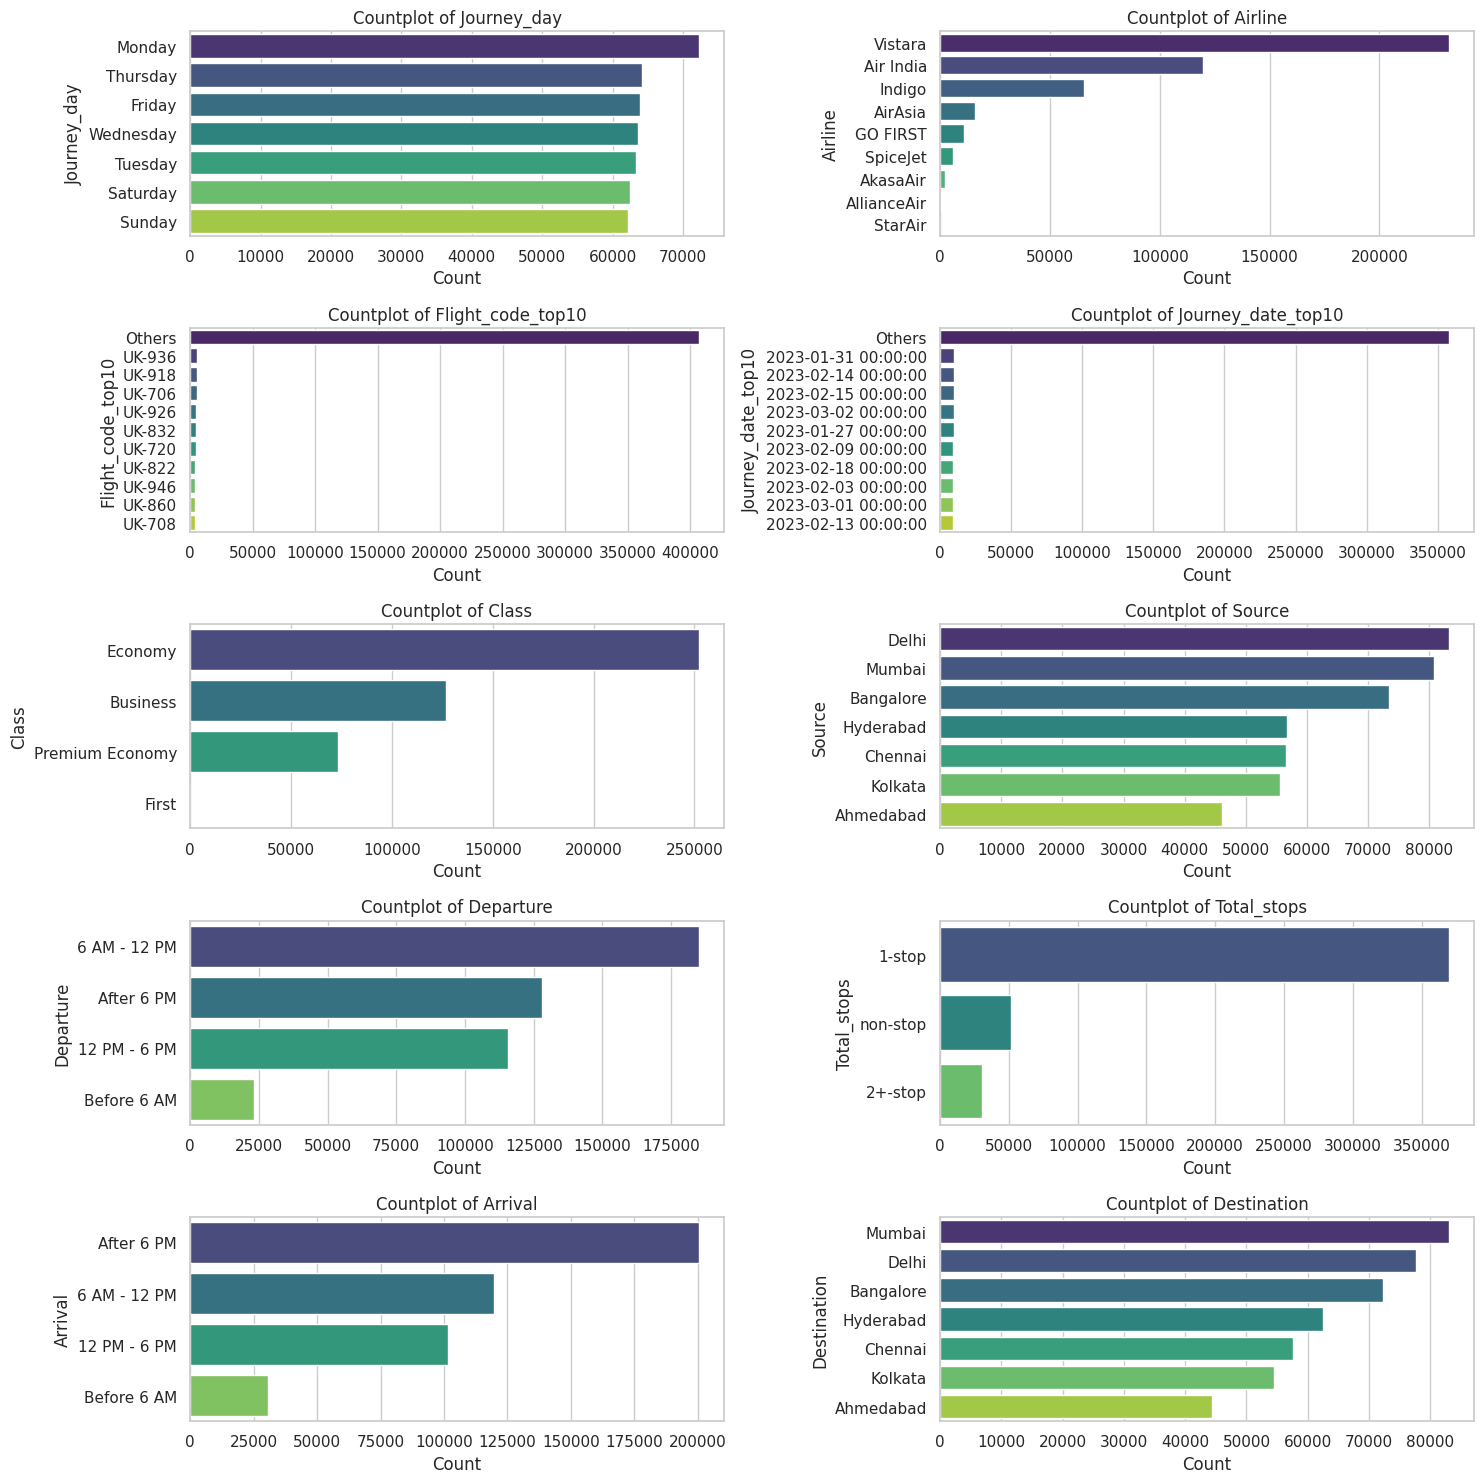

In [97]:
plt.figure(figsize=(15,15))
t = 1
for i in cat2:
  plt.subplot(5,2,t)
  plt.title(f'Countplot of {i}')
  sns.countplot(df[i], palette='viridis', order=df[i].value_counts().index)
  plt.xlabel('Count')
  plt.ylabel(i)
  t+=1
plt.tight_layout()
plt.show()

Bi-Variate Analysis

Numeric columns vs Target variable Fare

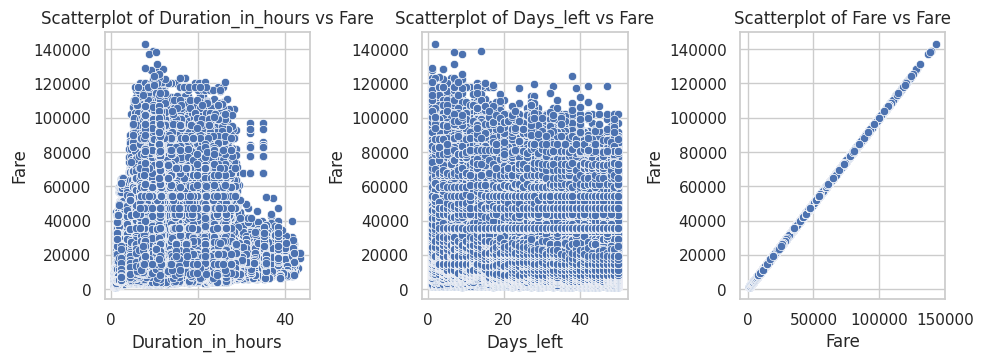

In [98]:
plt.figure(figsize=(10,10))
t=1
for i in num:
  plt.subplot(3,3,t)
  plt.title(f'Scatterplot of {i} vs Fare')
  sns.scatterplot(x=df[i], y=df['Fare'])
  plt.xlabel(i)
  plt.ylabel('Fare')
  t+=1
plt.tight_layout()
plt.show()

Categoric columns vs target variable Fare

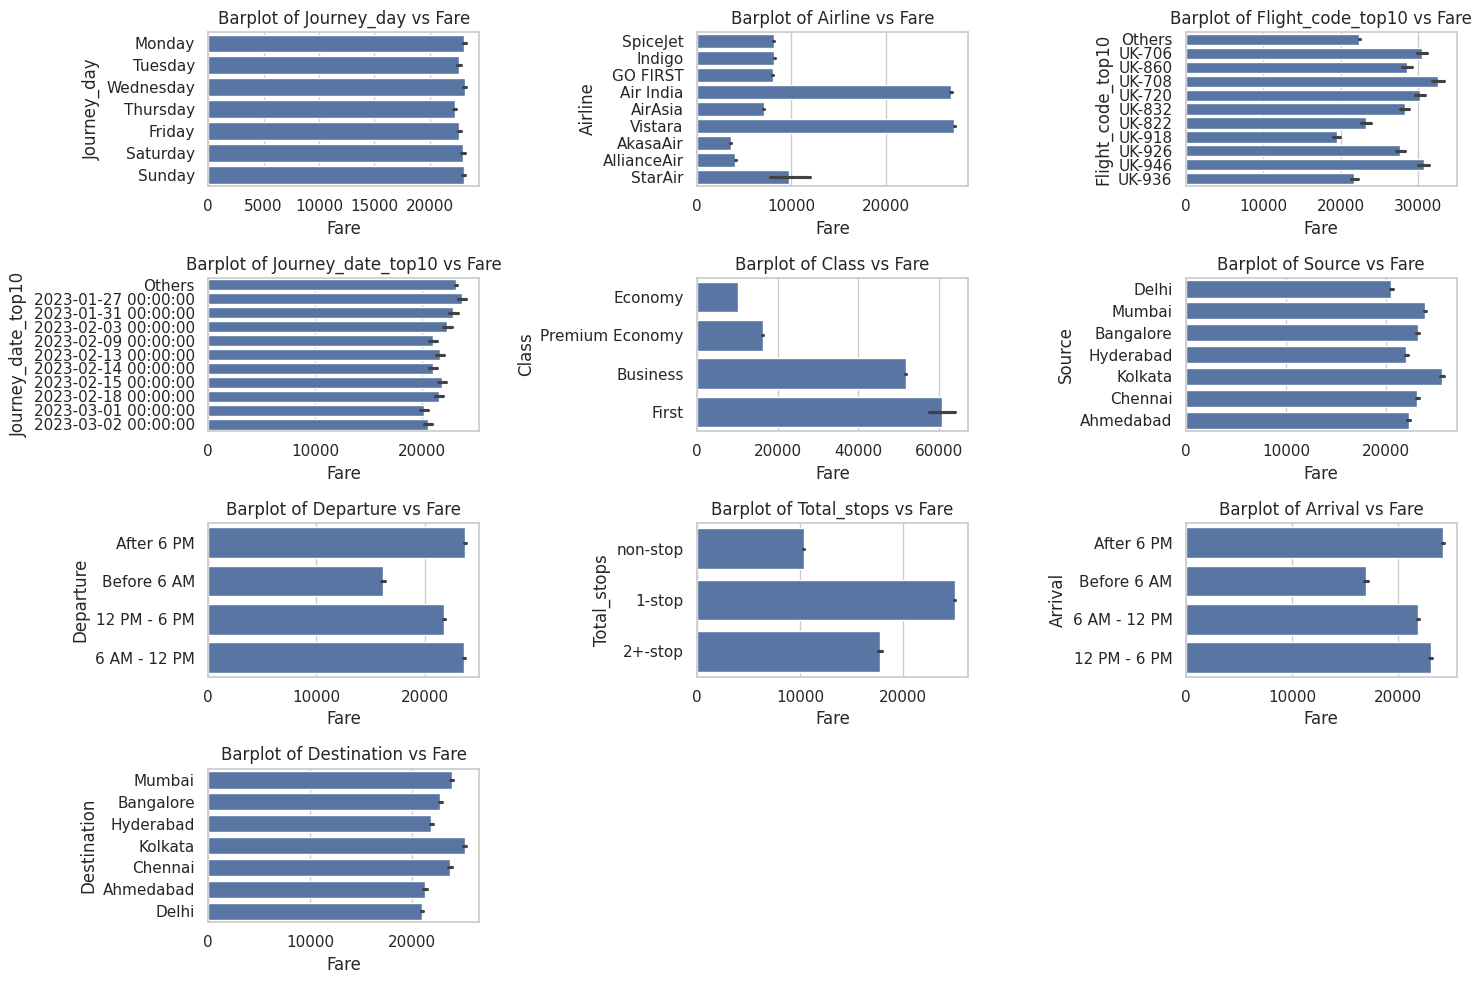

In [99]:
plt.figure(figsize=(15,10))
t=1
for i in cat2:
  plt.subplot(4,3,t)
  plt.title(f'Barplot of {i} vs Fare')
  sns.barplot(y=df[i], x=df['Fare'])
  plt.xlabel('Fare')
  plt.ylabel(i)
  t+=1
plt.tight_layout()
plt.show()

Multivariate Analysis

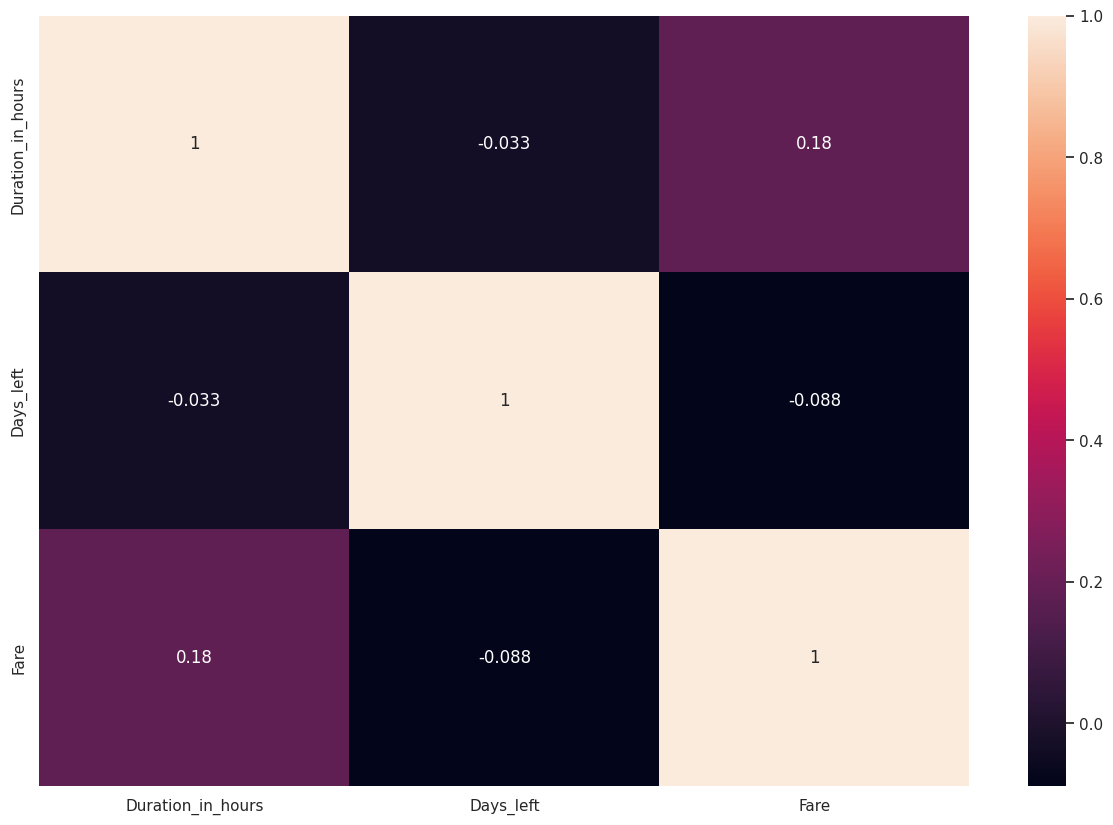

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(), annot=True)
plt.show()

Outlier Treatment

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_numeric_vs_fare(df, numeric_cols, target='Fare',
                                          n_bins=5, custom_labels=None):
    """
    Draws boxplots of Fare vs numeric variables (binned) with custom labels and outlier counts.

    Parameters:
    - df: DataFrame
    - numeric_cols: list of numeric column names
    - target: target column name (default = 'Fare')
    - n_bins: number of bins (default = 5)
    - custom_labels: dict, e.g. {'Duration_in_hours': ["Short", "Medium", "Long"], ...}
    """
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 5 * len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]

    default_labels = {
        5: ["Very Low", "Low", "Medium", "High", "Very High"],
        4: ["Low", "Medium-Low", "Medium-High", "High"],
        3: ["Low", "Medium", "High"],
        2: ["Low", "High"]
    }

    for ax, col in zip(axes, numeric_cols):
        temp = df[[col, target]].copy()
        unique_vals = temp[col].nunique()
        bins = min(n_bins, unique_vals)

        # Decide labels
        if custom_labels and col in custom_labels:
            labels = custom_labels[col]
            if len(labels) != bins:
                raise ValueError(f"Custom labels for {col} must have {bins} entries.")
        else:
            labels = default_labels.get(bins, [f"Bin{i+1}" for i in range(bins)])

        # Bin and label
        temp[f'{col}_bin'] = pd.cut(temp[col], bins=bins, labels=labels)

        # Plot
        sns.boxplot(x=f'{col}_bin', y=target, data=temp, palette="Blues", ax=ax)
        ax.set_title(f'{target} vs {col} (Binned & Labeled)')
        ax.set_xlabel(col)
        ax.set_ylabel(target)
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

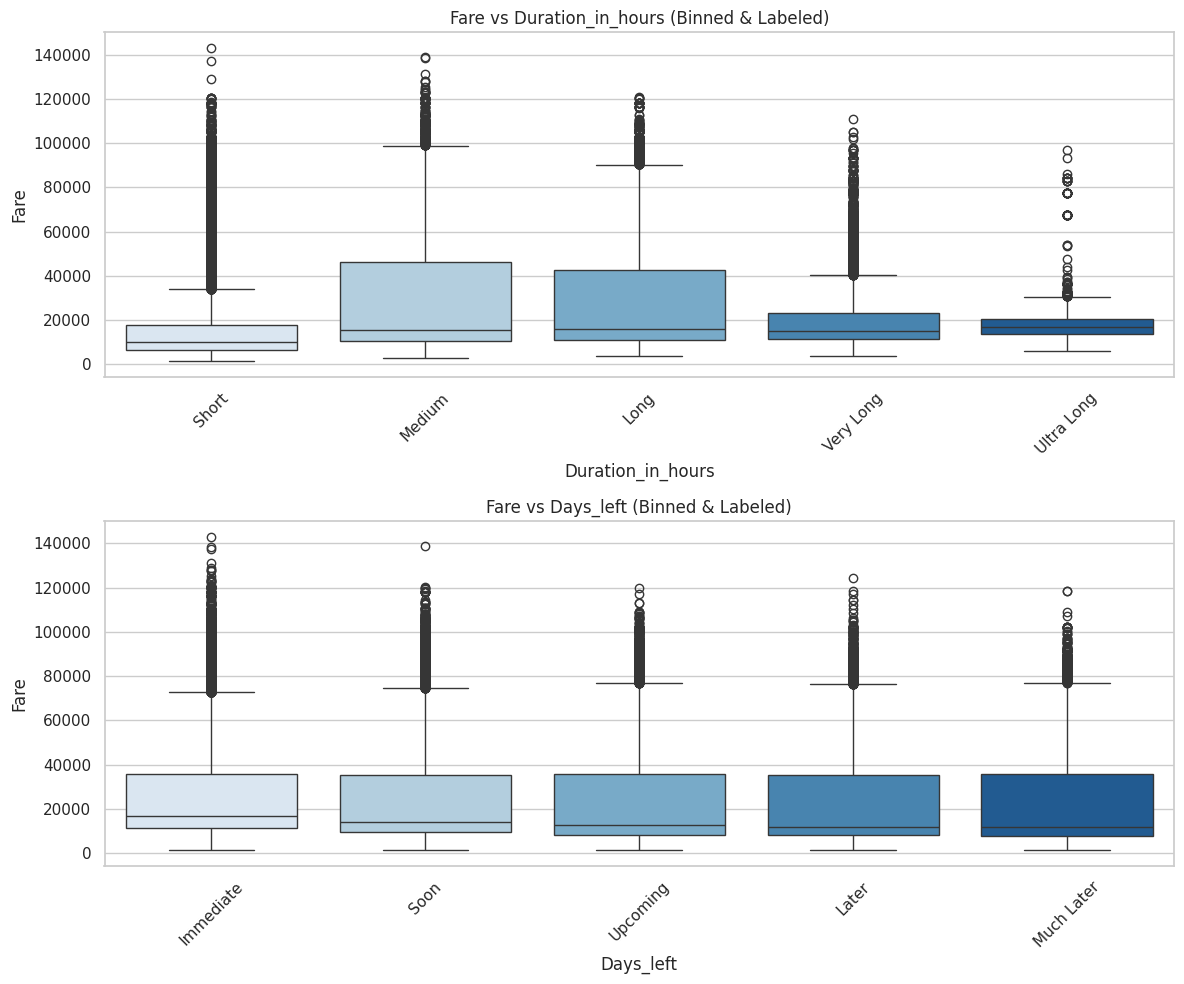

In [204]:
numeric_vars = ['Duration_in_hours', 'Days_left']
custom_bin_labels = {
    'Duration_in_hours': ["Short", "Medium", "Long", "Very Long", "Ultra Long"],
    'Days_left': ["Immediate", "Soon", "Upcoming", "Later", "Much Later"]
}

boxplot_numeric_vs_fare(df, numeric_vars, target='Fare',
                                      n_bins=5, custom_labels=custom_bin_labels)

In [205]:
iqr = num.quantile(0.75) - num.quantile(0.25)

lower_bound = num.quantile(0.25) - (1.5 * iqr)
upper_bound = num.quantile(0.75) + (1.5 * iqr)

num[((num < lower_bound) | (num > upper_bound)).any(axis=1)]

,Duration_in_hours,Days_left,Fare
356,14.2500,1,77222
357,6.8333,1,80761
358,14.6667,1,82010
359,12.8333,1,87481
360,15.4167,1,87481
...,...,...,...
451502,11.2500,46,77704
451503,11.1667,46,80148
451607,11.1667,47,80148
451608,11.2500,47,80678


In [109]:
print( lower_bound)
print('-------------')
print(upper_bound)

Duration_in_hours       -8.29175
Days_left              -24.50000
Fare                -31473.62500
dtype: float64
-------------
Duration_in_hours       31.37505
Days_left               75.50000
Fare                 75823.37500
dtype: float64


 Treatement of outliers

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cap_outliers_iqr(df, numeric_cols):
    df_capped = df.copy()
    capped_summary = {}

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_cap = q1 - 1.5 * iqr
        upper_cap = q3 + 1.5 * iqr

        # Count before capping
        lower_outliers = (df[col] < lower_cap).sum()
        upper_outliers = (df[col] > upper_cap).sum()

        # Apply capping
        df_capped[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

        # Store summary
        capped_summary[col] = {
            "Lower Cap": lower_cap,
            "Upper Cap": upper_cap,
            "Lower Outliers Capped": lower_outliers,
            "Upper Outliers Capped": upper_outliers
        }

    return df_capped, capped_summary

In [111]:
def plot_before_after_boxplots(df_before, df_after, numeric_cols):
    fig, axes = plt.subplots(2, len(numeric_cols), figsize=(5*len(numeric_cols), 8))

    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df_before[col], ax=axes[0, i], color='skyblue')
        axes[0, i].set_title(f"Before Capping: {col}")
        sns.boxplot(y=df_after[col], ax=axes[1, i], color='lightgreen')
        axes[1, i].set_title(f"After Capping: {col}")

    plt.tight_layout()
    plt.show()

In [112]:
# Apply capping
df_capped, summary = cap_outliers_iqr(df, num)

# Print summary
for col, stats in summary.items():
    print(f"\n{col}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Duration_in_hours:
  Lower Cap: -8.291749999999997
  Upper Cap: 31.375049999999998
  Lower Outliers Capped: 0
  Upper Outliers Capped: 4729

Days_left:
  Lower Cap: -24.5
  Upper Cap: 75.5
  Lower Outliers Capped: 0
  Upper Outliers Capped: 0

Fare:
  Lower Cap: -31473.625
  Upper Cap: 75823.375
  Lower Outliers Capped: 0
  Upper Outliers Capped: 9245


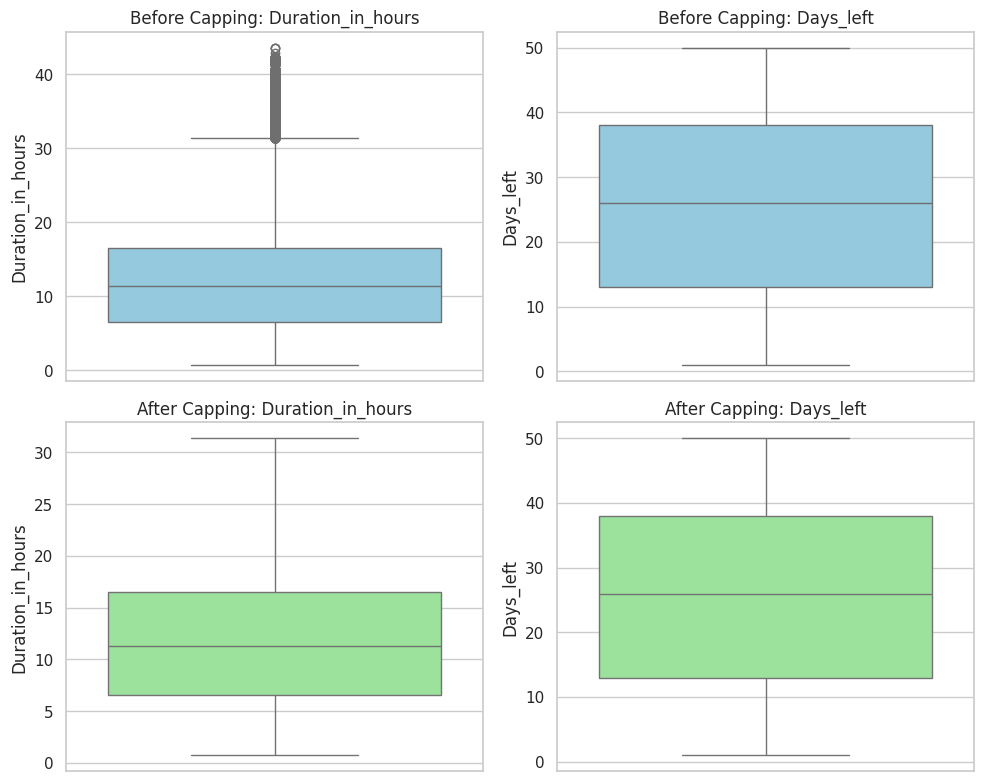

In [113]:
# Plot before vs after
plot_before_after_boxplots(df, df_capped, numeric_vars)

In [114]:
df.to_csv(r'/content/drive/MyDrive/ML project/EDA.csv', index = False)

## SECTION 2: STATISTICAL ANALYSIS & BASELINE MODEL

In [115]:
data = pd.read_csv('/content/drive/MyDrive/ML project/EDA.csv')

In [116]:
df= data.copy()
df.head(5)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Date,Month,Flight_code_top10,Journey_date_top10
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16,1,Others,Others
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16,1,Others,Others
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16,1,Others,Others
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16,1,Others,Others
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16,1,Others,Others


Stats

In [117]:
df['Date_of_journey_top10'] = df['Journey_date_top10'].astype('object')

In [118]:
df.drop(['Journey_date_top10'], axis=1, inplace=True)

In [119]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Date,Month,Flight_code_top10,Date_of_journey_top10
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16,1,Others,Others
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16,1,Others,Others
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16,1,Others,Others
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16,1,Others,Others
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16,1,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028,6,3,UK-926,Others
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,6,3,UK-918,Others
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,6,3,UK-918,Others
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980,6,3,UK-946,Others


In [120]:
def  draw_countplot(df, i, var, target):
     import  matplotlib.pyplot   as  plt
     import  seaborn             as  sns
     print("\n{0}: Variable, {1}".format(i, var))
     x         =  df[var]
     y         =  df[target]
     ttile     =  "Bar Chart for the variable: {}".format(var)
     plt.title(ttile)
     sns.countplot(x = x, hue = y, data = df)
     plt.xticks(rotation = 90)
     plt.show()

In [121]:
def chk_dagastino(data, var):
    # D'Agostino and Pearson's Test
    from numpy.random import seed
    from scipy.stats  import normaltest
    # normality test
    stat, p  =  normaltest(data[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
    	print('Sample looks Gaussian (fail to reject H0)', 'col ', var)
    else:
    	print('Sample does not look Gaussian (reject H0)', 'col ', var)

In [122]:
from scipy.stats import levene

def check_equal_variance(df, target='Fare'):
    """
    Checks equal variance for the target variable against all categorical features.
    Uses Levene's test and produces clean boxplots with overlay points.

    Parameters:
    df (pd.DataFrame): Dataset
    target (str): Target variable name (default 'Fare')
    """
    categorical_cols = ['Journey_day', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival',
                        'Destination', 'Flight_code_top10', 'Date_of_journey_top10']

    for col in categorical_cols:
        if col == target:
            continue

        print(f"\n--- Checking variance for {target} across {col} ---")
        # Prepare groups
        groups = [df[target][df[col] == val].dropna() for val in df[col].unique()]

        # Levene's test
        stat, p_value = levene(*groups)
        print(f"Levene's Test: Statistic={stat:.4f}, p-value={p_value:.4f}")
        if p_value > 0.05:
            print("→ Fail to reject H₀: Variances are equal.")
        else:
            print("→ Reject H₀: Variances are not equal.")

        # Plot:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=col, y=target, data=df, showfliers=True, palette="Set3",)

        plt.title(f'{target} by {col}\nLevene p-value: {p_value:.4g} | '
                  + ('Reject H₀: Variances are not equal' if p_value < 0.05
                     else 'Fail to Reject H₀: Variances are equal'),
                  fontsize=12)

        plt.xticks(rotation=45, ha='right')
        plt.ylabel(target)
        plt.xlabel(col)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

In [123]:
import scipy.stats as stats

def chk_kruskal(df, cat_col, target_col):
    """
    Perform Kruskal-Wallis test for one categorical column vs a numeric target column
    """
    # Group target values by each category
    groups = [group[target_col].values for name, group in df.groupby(cat_col)]

    # Perform Kruskal-Wallis test
    stat, pval = stats.kruskal(*groups)

    if pval < 0.05:
        print(f"\nAt least one group differs significantly for {cat_col} (p={pval:.4f})")
    else:
        print(f"\nNo significant difference between groups for {cat_col} (p={pval:.4f})")

In [124]:
!pip install scikit_posthocs

In [125]:
def dunns_post_hoc(df, cat_col, target):
  import scikit_posthocs as sp

  # Perform Dunn's post hoc test
  dunn_result = sp.posthoc_dunn(df, val_col=target, group_col=cat_col, p_adjust='bonferroni')

  # Display pairwise p-values
  print(dunn_result)

In [126]:
def create_fare_bins(df, target='Fare', n_bins=4):
    # Define labels for bins
    labels = ["Low Fare", "Medium-Low Fare", "Medium-High Fare", "High Fare"][:n_bins]

    # Create quantile-based bins
    df[f"{target}_binned"] = pd.qcut(df[target], q=n_bins, labels=labels, duplicates='drop')

    # Plot the distribution of bins
    plt.figure(figsize=(8, 5))
    sns.countplot(x=f"{target}_binned", data=df, palette="Set2", order=labels)
    plt.title(f"Distribution of {target} (Binned)")
    plt.xlabel(f"{target} (Binned)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    return df, f"{target}_binned"

In [127]:
def chi_square(df, categorical_cols, target_binned):
    """
    Performs Chi-Square test using already binned target.

    Parameters:
        df (pd.DataFrame): Dataset with binned target column
        categorical_cols (list): List of categorical columns
        target_binned (str): Binned target column name
    """
    results = []
    for i, col in enumerate(categorical_cols, start=1):
        print(f"\n{i}: Variable, {col}")

        # Crosstab & chi-square
        crosstab = pd.crosstab(df[col], df[target_binned])
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)

        percentage_low_expected = (expected < 5).sum().sum() / expected.size * 100
        print(f"Percentage of cells with expected counts < 5: {percentage_low_expected:.2f}%")
        print(f"Chi2={chi2:.4f}, p={p:.4g}, dof={dof}")

        interpretation = "Dependent (Reject H₀)" if p < 0.05 else "Independent (Fail to Reject H₀)"
        print(f"→ {interpretation}")

        results.append({
            "Variable": col,
            "Chi2": chi2,
            "p-value": p,
            "dof": dof,
            "% cells <5": percentage_low_expected,
            "Interpretation": interpretation
        })

    return pd.DataFrame(results).sort_values("p-value")

###  Checking for Normality

The D’Agostino’s K² Test is a statistical test used to determine whether a dataset follows a normal distribution, and it’s particularly useful when you want to assess both skewness and kurtosis simultaneously. When to Use D’Agostino’s K² Test

Testing for Normality in Continuous Data Ideal when you need to validate the assumption of normality before applying parametric tests like linear regression, t-tests, or ANOVA. When You Suspect Skewness or Kurtosis Unlike tests that focus on one aspect (e.g., Shapiro-Wilk for general shape), D’Agostino’s K² combines skewness and kurtosis into a single omnibus test statistic. Moderate to Large Sample Sizes It performs best with n ≥ 20, and its accuracy improves with larger datasets. For very small samples, Shapiro-Wilk might be more reliable.

In [128]:
num_cols = ['Duration_in_hours', 'Days_left', 'Fare']

In [129]:
df_N      =   df.loc[:,num_cols]
for var in num_cols :
    chk_dagastino(df_N, var)

Statistics=27463.418, p=0.000
Sample does not look Gaussian (reject H0) col  Duration_in_hours
Statistics=348042.627, p=0.000
Sample does not look Gaussian (reject H0) col  Days_left
Statistics=88145.139, p=0.000
Sample does not look Gaussian (reject H0) col  Fare


The assumption of normality doesnot met so using LOG transfomer on target variable Fare

In [130]:
df['Fare_tr']=np.log(df['Fare'])

In [131]:
num_cols1 = ['Duration_in_hours', 'Days_left', 'Fare_tr']

In [132]:
# Define the numerical  for analysis
df_N      =   df.loc[:, num_cols1]
for var in num_cols1 :
    chk_dagastino(df_N, var)

Statistics=27463.418, p=0.000
Sample does not look Gaussian (reject H0) col  Duration_in_hours
Statistics=348042.627, p=0.000
Sample does not look Gaussian (reject H0) col  Days_left
Statistics=44460.878, p=0.000
Sample does not look Gaussian (reject H0) col  Fare_tr


### Observations

Based on the The D’Agostino’s K^2 test, we find that the numeric columns in dataset does significantly deviate from normal.

## Checking for Equal Variance

In [133]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Date,Month,Flight_code_top10,Date_of_journey_top10,Fare_tr
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,16,1,Others,Others,8.582044
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,16,1,Others,Others,8.682538
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,16,1,Others,Others,8.665786
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,16,1,Others,Others,8.664578
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,16,1,Others,Others,8.691986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028,6,3,UK-926,Others,11.082573
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,6,3,UK-918,Others,11.145536
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,6,3,UK-918,Others,11.145536
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980,6,3,UK-946,Others,11.197941



--- Checking variance for Fare across Journey_day ---
Levene's Test: Statistic=18.2872, p-value=0.0000
→ Reject H₀: Variances are not equal.


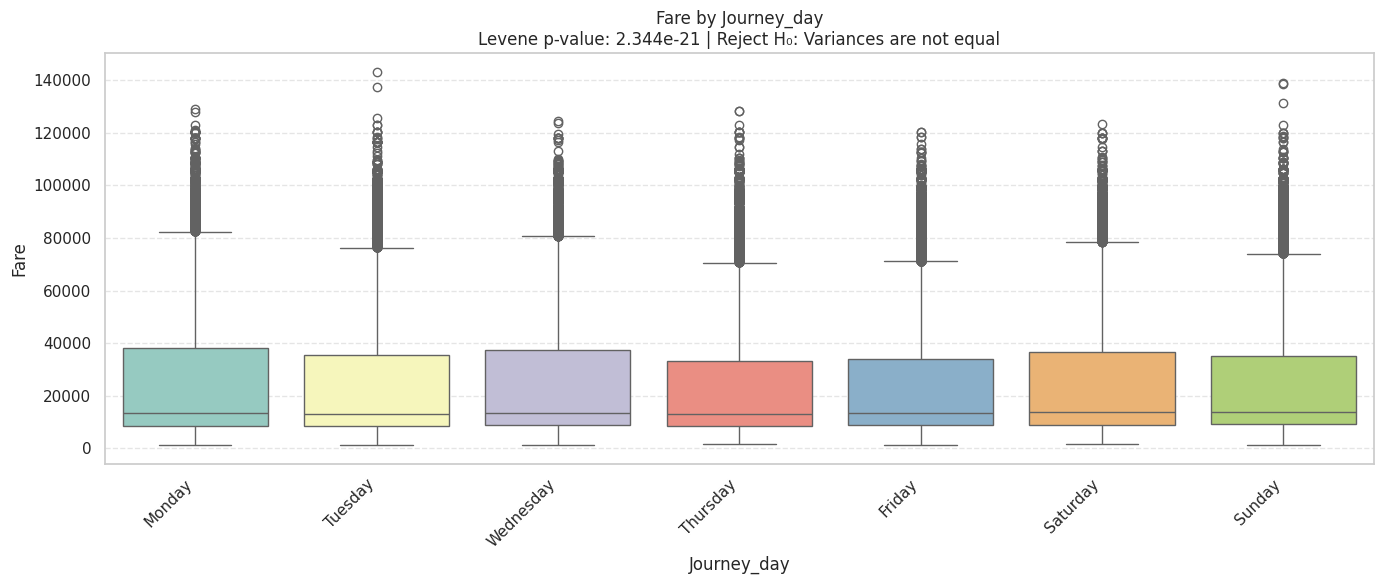


--- Checking variance for Fare across Airline ---
Levene's Test: Statistic=7762.2960, p-value=0.0000
→ Reject H₀: Variances are not equal.


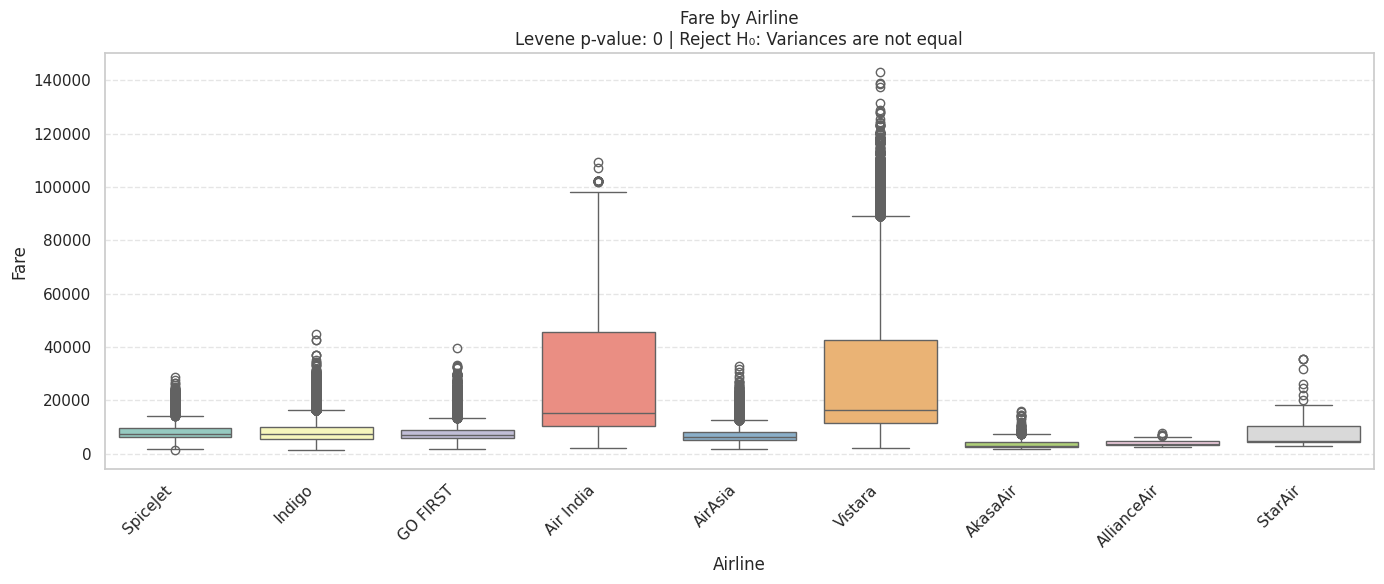


--- Checking variance for Fare across Class ---
Levene's Test: Statistic=43319.9807, p-value=0.0000
→ Reject H₀: Variances are not equal.


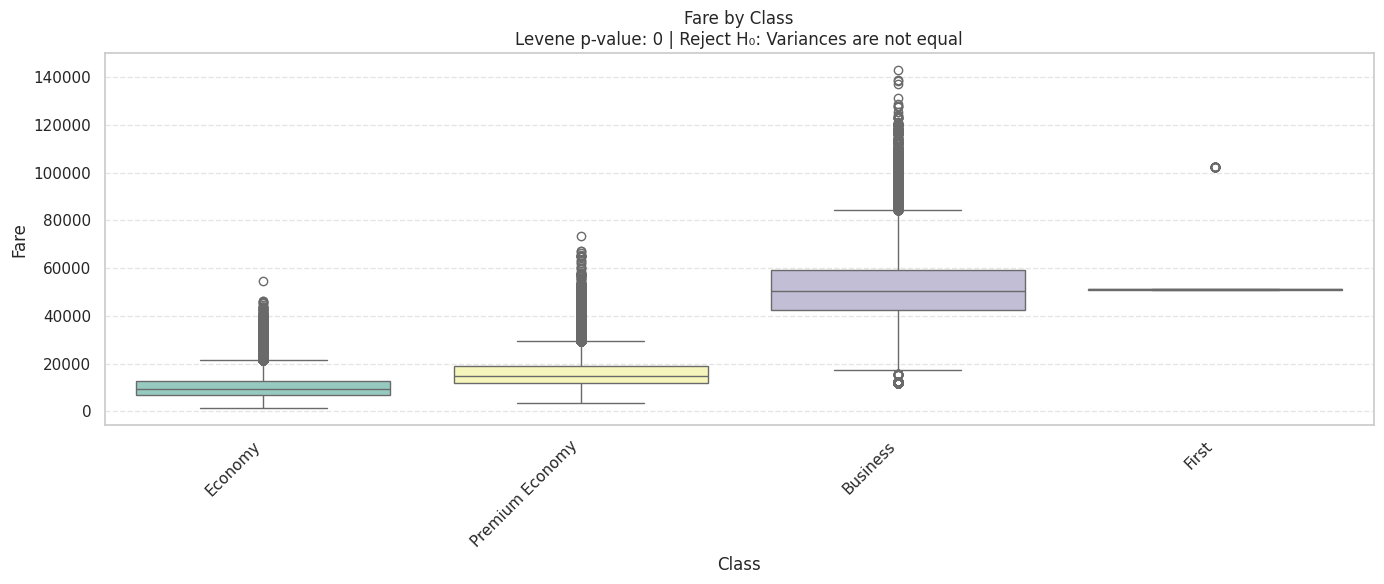


--- Checking variance for Fare across Source ---
Levene's Test: Statistic=287.9983, p-value=0.0000
→ Reject H₀: Variances are not equal.


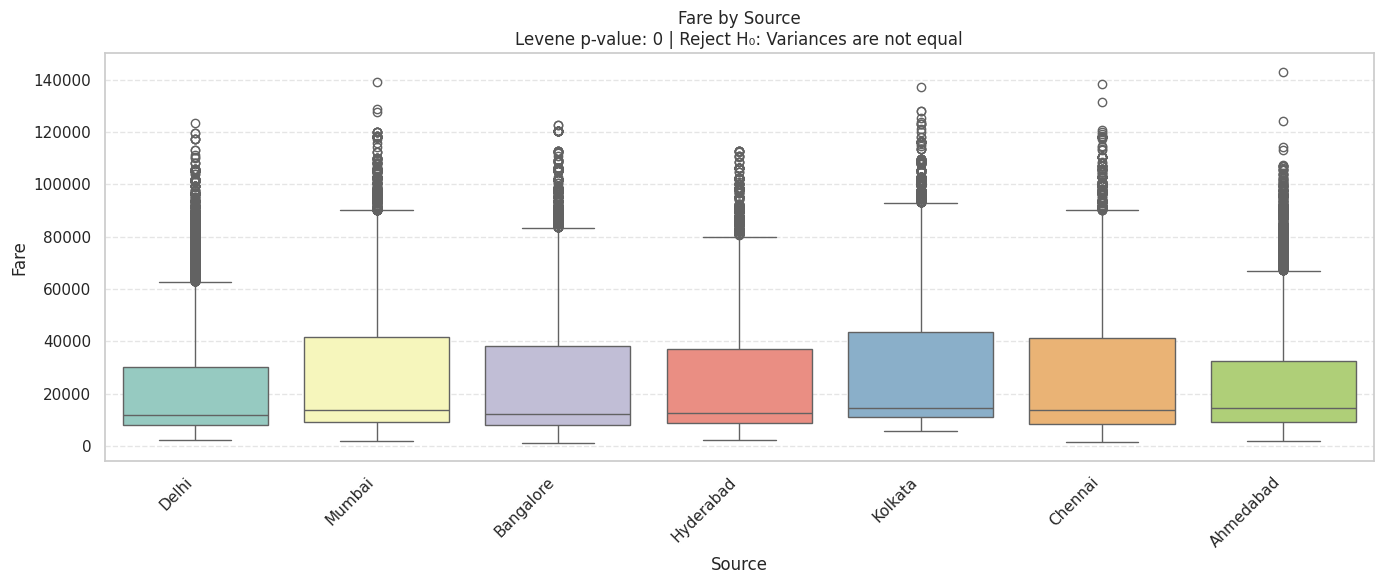


--- Checking variance for Fare across Departure ---
Levene's Test: Statistic=888.3806, p-value=0.0000
→ Reject H₀: Variances are not equal.


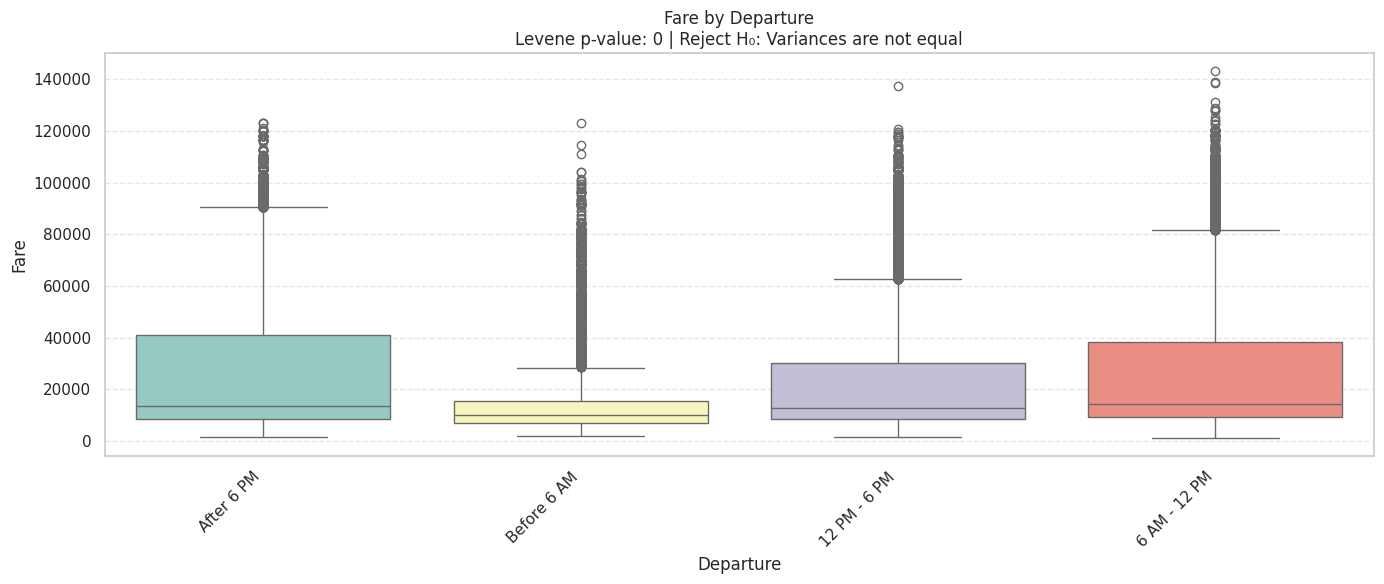


--- Checking variance for Fare across Total_stops ---
Levene's Test: Statistic=10555.6223, p-value=0.0000
→ Reject H₀: Variances are not equal.


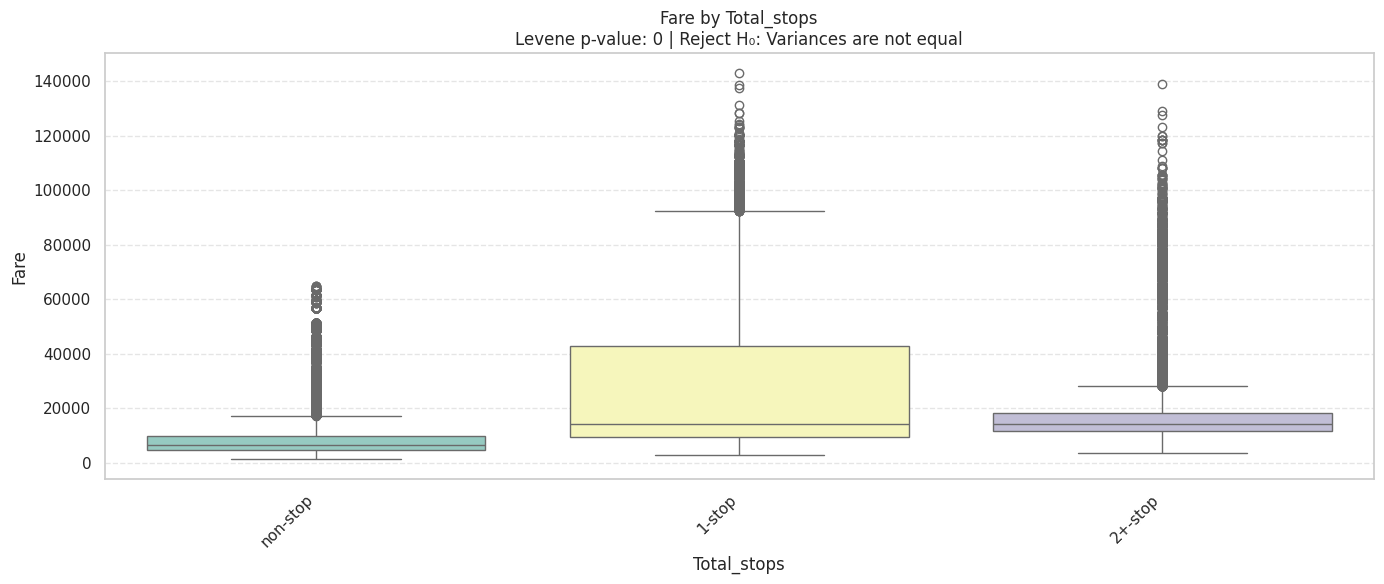


--- Checking variance for Fare across Arrival ---
Levene's Test: Statistic=691.8446, p-value=0.0000
→ Reject H₀: Variances are not equal.


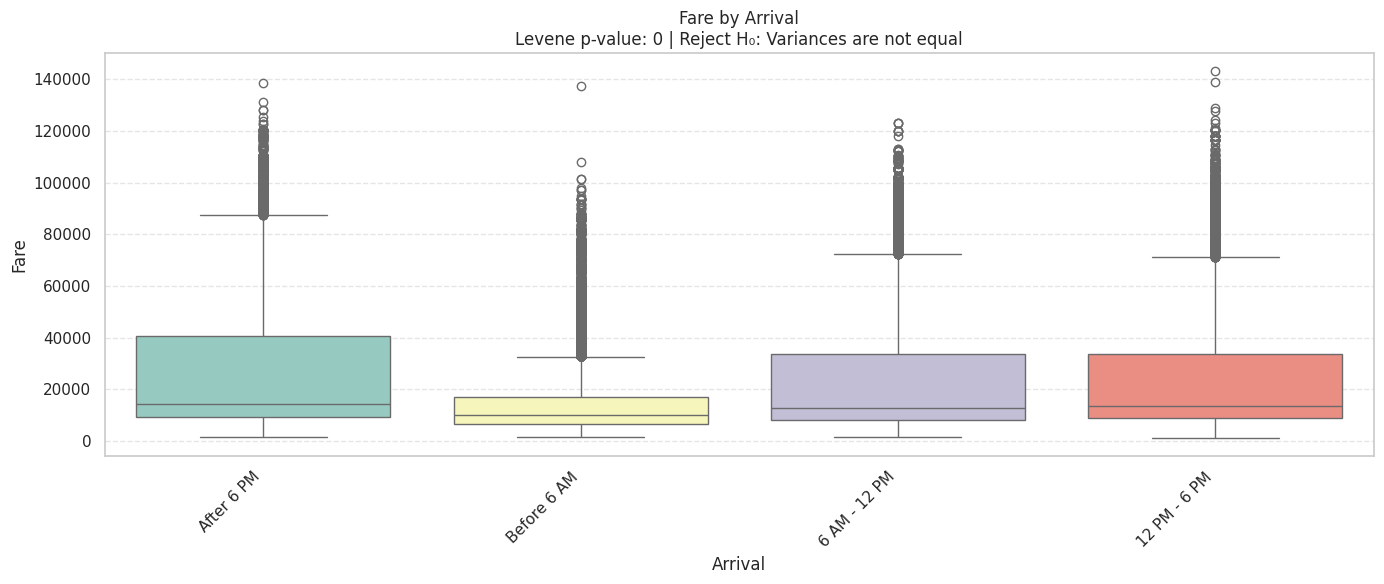


--- Checking variance for Fare across Destination ---
Levene's Test: Statistic=213.0180, p-value=0.0000
→ Reject H₀: Variances are not equal.


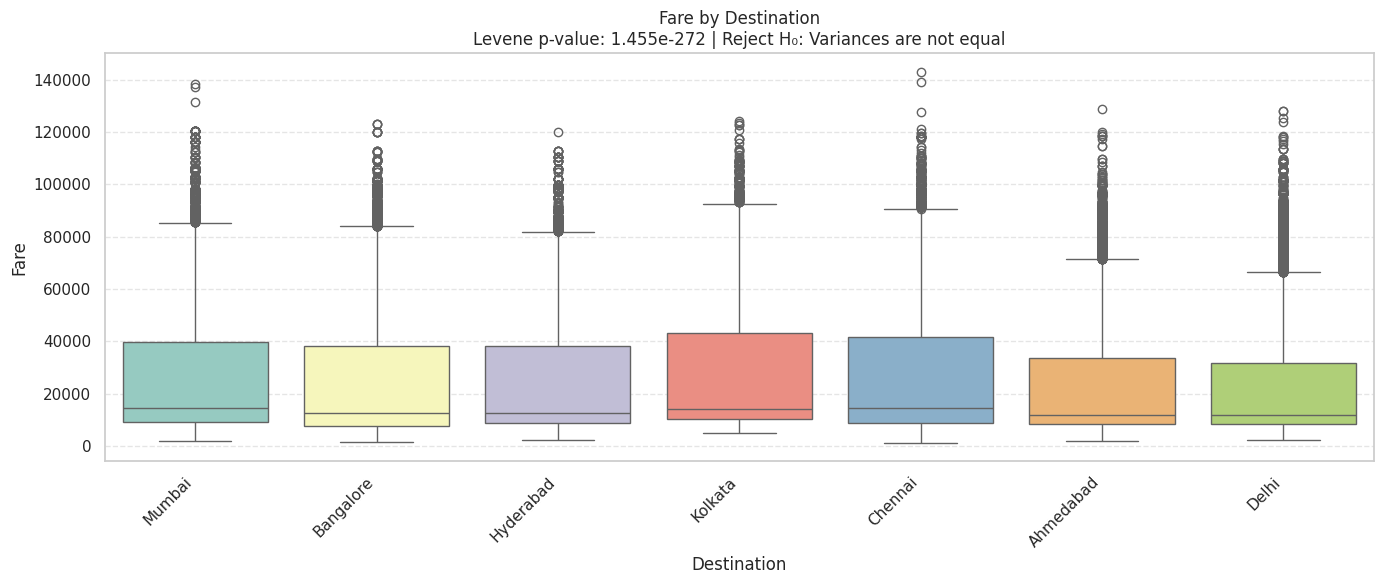


--- Checking variance for Fare across Flight_code_top10 ---
Levene's Test: Statistic=68.5054, p-value=0.0000
→ Reject H₀: Variances are not equal.


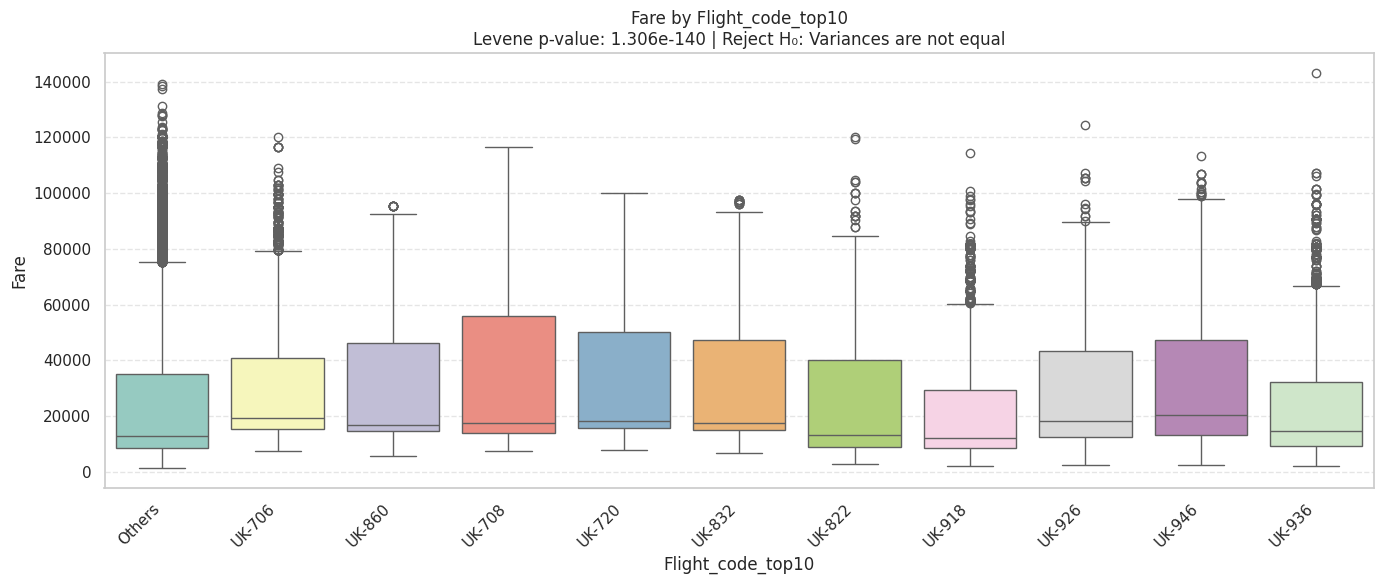


--- Checking variance for Fare across Date_of_journey_top10 ---
Levene's Test: Statistic=24.5653, p-value=0.0000
→ Reject H₀: Variances are not equal.


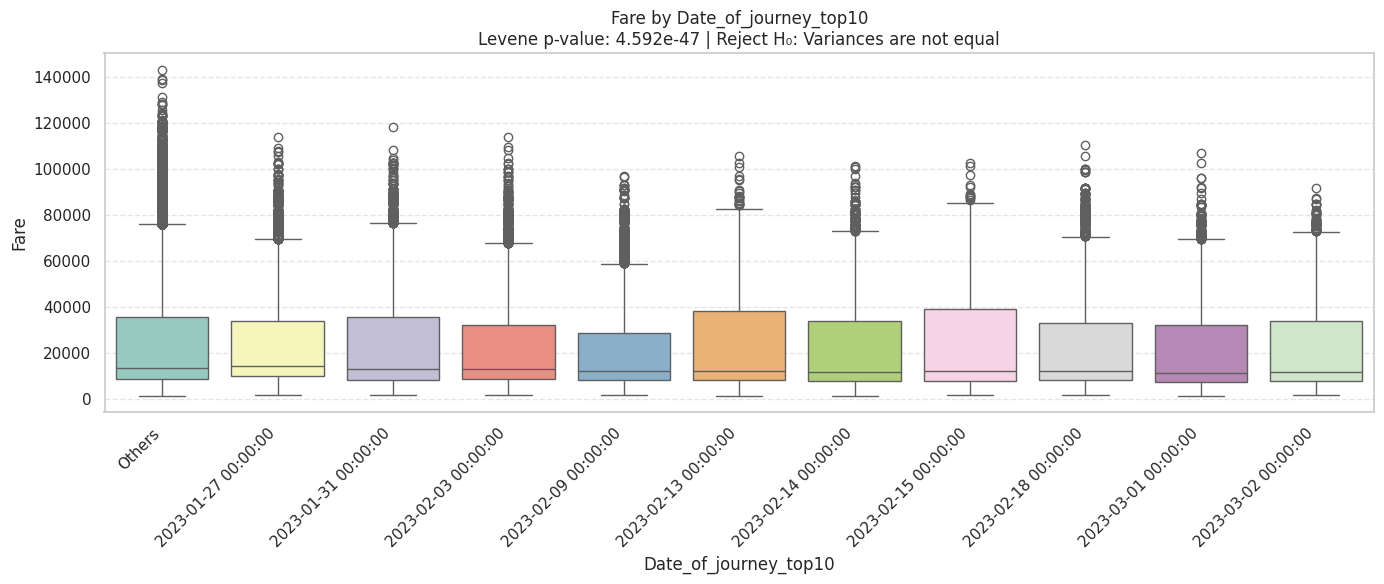

In [134]:
check_equal_variance(df, target='Fare')

### Observation
The variance are not equal

In [135]:
df.select_dtypes(include=['object', 'category']).columns.tolist()

['Date_of_journey',
 'Journey_day',
 'Airline',
 'Flight_code',
 'Class',
 'Source',
 'Departure',
 'Total_stops',
 'Arrival',
 'Destination',
 'Flight_code_top10',
 'Date_of_journey_top10']

In [136]:
categorical_cols = ['Airline', 'Flight_code_top10', 'Date_of_journey_top10',
                    'Class', 'Source', 'Departure', 'Total_stops',
                    'Arrival', 'Destination']

### CONCLUSION
As the assumptions for ANOVA are not met. We choose to do Non-parameteric test Kruskal Wallis Test

In [137]:
for col in categorical_cols:
    chk_kruskal(df, col, 'Fare')


At least one group differs significantly for Airline (p=0.0000)

At least one group differs significantly for Flight_code_top10 (p=0.0000)

At least one group differs significantly for Date_of_journey_top10 (p=0.0000)

At least one group differs significantly for Class (p=0.0000)

At least one group differs significantly for Source (p=0.0000)

At least one group differs significantly for Departure (p=0.0000)

At least one group differs significantly for Total_stops (p=0.0000)

At least one group differs significantly for Arrival (p=0.0000)

At least one group differs significantly for Destination (p=0.0000)


In [138]:
for col in categorical_cols:
    print(f"\n--- Dunn's post hoc for {col} ---")
    dunns_post_hoc(df, col, 'Fare')


--- Dunn's post hoc for Airline ---
                 Air India       AirAsia       AkasaAir    AllianceAir  \
Air India     1.000000e+00  0.000000e+00   0.000000e+00  1.055943e-297   
AirAsia       0.000000e+00  1.000000e+00   5.128189e-87   8.940683e-18   
AkasaAir      0.000000e+00  5.128189e-87   1.000000e+00   1.000000e+00   
AllianceAir  1.055943e-297  8.940683e-18   1.000000e+00   1.000000e+00   
GO FIRST      0.000000e+00  4.770822e-28  1.347883e-141   5.230982e-30   
Indigo        0.000000e+00  1.741164e-98  2.078321e-192   6.228443e-36   
SpiceJet      0.000000e+00  4.058241e-25  2.526882e-133   2.371272e-31   
StarAir       1.198597e-18  1.000000e+00   2.906601e-06   1.150927e-05   
Vistara      4.432076e-103  0.000000e+00   0.000000e+00   0.000000e+00   

                  GO FIRST         Indigo       SpiceJet       StarAir  \
Air India     0.000000e+00   0.000000e+00   0.000000e+00  1.198597e-18   
AirAsia       4.770822e-28   1.741164e-98   4.058241e-25  1.000000e+00   


### Key observations
1. Airline
The p-values for most airline comparisons are extremely small, often 0.000000e+00 or close to it. This indicates that the fare distributions among different airlines are highly statistically significant. For example, the fare distribution for 'Air India' is significantly different from 'AkasaAir', 'AllianceAir', and others. However, some comparisons show p-values greater than 0.05, such as 'GO FIRST' vs. 'Vistara' (2.069276e−04) and 'StarAir' vs. 'Vistara' (3.405765e−21), which also indicate a significant difference. In some cases, a high p-value indicates that there is no significant difference between the airlines. For instance, 'GO FIRST' vs. 'Indigo' (2.069276e−04) shows that there is a significant difference between the two airline's prices.

2. Flight Code
The p-values for most comparisons between different flight codes are extremely small, with many being 0.000000e+00. This suggests that the fare distributions vary significantly between different flights. For example, 'UK-706' and 'UK-720' show a p-value of 1.000000e+00, which indicates that the fares for these two flights are not significantly different. However, 'UK-946' and 'UK-822' show a p-value of 4.150819e−118, which indicates that the fare distributions are highly significant.

3. Journey Date
The p-values for most journey date comparisons are very small, with many being less than 0.05. This suggests that the journey date is a significant driver of fare differences. For instance, the p-value for the comparison between '2023-01-27' and '2023-01-31' is 1.435404e−20, which is highly significant. However, some comparisons, such as '2023-02-09' vs. '2023-02-13', have a p-value of 1.000000e+00, indicating that the fares for these specific dates are not significantly different. This implies that while the date generally affects fares, some consecutive or closely spaced dates may have similar pricing.

4. Class
The p-values for all comparisons of different classes (Business, Economy, First, Premium Economy) are extremely small, with many at 0.000000e+00 or close to it. This suggests that the fare distributions across different classes are highly statistically significant. This means that the ticket fare is not uniform across different travel classes; the prices for Business, Economy, First, and Premium Economy are distinctly different.

5. Source
All comparisons between different source cities show extremely small p-values (e.g., 2.950502e−57, 1.644442e−18, etc.), with many being 0.000000e+00. This indicates that the departure city has a very significant impact on ticket fares, and the cost of a flight varies greatly depending on the city of origin.

6. Destination
The p-values for most comparisons between destination cities are very small, indicating a significant difference in fares based on the destination. For example, the p-value for 'Ahmedabad' vs. 'Kolkata' is 0.000000e+00. However, some comparisons, like 'Ahmedabad' vs. 'Delhi', have a p-value of 1.645926e−01, which is greater than 0.05. This suggests that the fare distributions for these two destination cities are not statistically different.

7. Total Stops
The comparison between '1-stop' and 'non-stop' flights shows a p-value of 0.063261. Since this value is greater than 0.05, it suggests that the fare distributions for these two categories are not statistically different. However, the p-values for comparisons involving '2+-stop' flights are extremely small, indicating a significant difference in fares. This implies that while '1-stop' and 'non-stop' fares may be similar, fares for flights with two or more stops are priced distinctly.

8. Arrival
Most comparisons of different arrival time slots show extremely small p-values. For instance, the p-value for '12 PM - 6 PM' vs. 'Before 6 AM' is 0.0. However, the p-value for a time slot compared to itself is 1.0, indicating no difference. This suggests that the arrival time slot has a significant effect on the fare, and the fares are not uniform across the different time slots.

9. Departure
The p-values for most comparisons between different departure time slots (e.g., "12 PM - 6 PM" vs. "6 AM - 12 PM") are extremely small. However, the comparisons of a time slot with itself are 1.0. For example, "12 PM - 6 PM" vs. "12 PM - 6 PM" has a p-value of 1.0. The comparisons between "Before 6 AM" and other time slots have a p-value of 0.0. This indicates that the departure time slot has a strong and significant effect on the fare, and the fares are not uniform across the different time slots.

Overall Conclusion
The Dunn's post-hoc test results reveal that Airline, Flight Code, Journey Date, Class, Source, and Departure are all highly significant drivers of fare differences. The p-values for these factors are consistently much smaller than the standard significance level of 0.05. This indicates that for each of these factors, the fare distributions for most category pairs are statistically different. This suggests that the pricing structure is not uniform; each of these factors independently and strongly influences the final ticket fare. However, for Total Stops, the fares for '1-stop' and 'non-stop' are not significantly different. Similarly, some comparisons for Journey Date and Destination show no significant differences, suggesting that their fare distributions are similar in those specific instances.

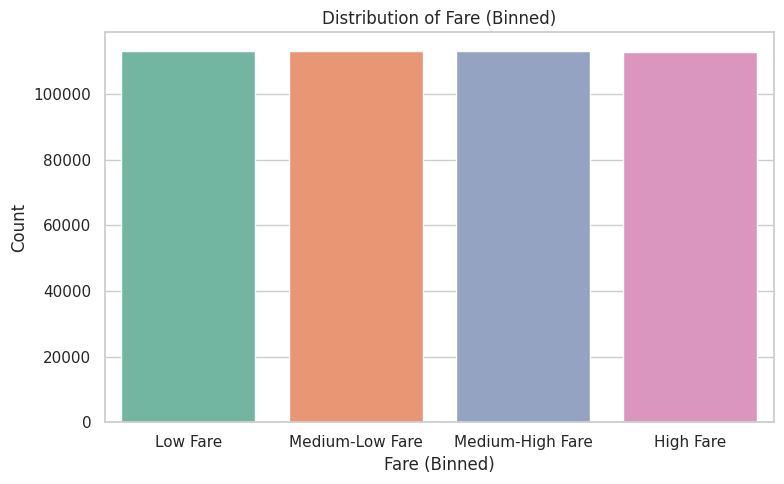

In [139]:
# Distribution of the fare that is binned for analysis purposes.
df, target_binned = create_fare_bins(df, target='Fare', n_bins=4)
# Drop temporary target bin column if created
if 'target_binned' in df.columns:
  df.drop(columns='target_binned', inplace=True)

CHI-SQUARE - TEST FOR INDEPENDENCE

In [140]:
chi_square(df, categorical_cols, target_binned)


1: Variable, Airline
Percentage of cells with expected counts < 5: 0.00%
Chi2=162698.4411, p=0, dof=24
→ Dependent (Reject H₀)

2: Variable, Flight_code_top10
Percentage of cells with expected counts < 5: 0.00%
Chi2=20837.4149, p=0, dof=30
→ Dependent (Reject H₀)

3: Variable, Date_of_journey_top10
Percentage of cells with expected counts < 5: 0.00%
Chi2=3091.5231, p=0, dof=30
→ Dependent (Reject H₀)

4: Variable, Class
Percentage of cells with expected counts < 5: 0.00%
Chi2=441524.8343, p=0, dof=9
→ Dependent (Reject H₀)

5: Variable, Source
Percentage of cells with expected counts < 5: 0.00%
Chi2=11316.9658, p=0, dof=18
→ Dependent (Reject H₀)

6: Variable, Departure
Percentage of cells with expected counts < 5: 0.00%
Chi2=7507.1020, p=0, dof=9
→ Dependent (Reject H₀)

7: Variable, Total_stops
Percentage of cells with expected counts < 5: 0.00%
Chi2=92776.3329, p=0, dof=6
→ Dependent (Reject H₀)

8: Variable, Arrival
Percentage of cells with expected counts < 5: 0.00%
Chi2=8161.701

,Variable,Chi2,p-value,dof,% cells <5,Interpretation
0,Airline,162698.441113,0.0,24,0.0,Dependent (Reject H₀)
1,Flight_code_top10,20837.414901,0.0,30,0.0,Dependent (Reject H₀)
2,Date_of_journey_top10,3091.523126,0.0,30,0.0,Dependent (Reject H₀)
3,Class,441524.834324,0.0,9,0.0,Dependent (Reject H₀)
4,Source,11316.965844,0.0,18,0.0,Dependent (Reject H₀)
5,Departure,7507.102014,0.0,9,0.0,Dependent (Reject H₀)
6,Total_stops,92776.332892,0.0,6,0.0,Dependent (Reject H₀)
7,Arrival,8161.701932,0.0,9,0.0,Dependent (Reject H₀)
8,Destination,9435.580468,0.0,18,0.0,Dependent (Reject H₀)


In [141]:
df = df.drop('Fare_binned',axis=1)

Encoding

In [142]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Date', 'Month',
       'Flight_code_top10', 'Date_of_journey_top10', 'Fare_tr'],
      dtype='object')

In [143]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma

In [144]:
# Drop target columns and identifiers from features
x = df.drop(columns=['Fare', 'Fare_tr'])   # Features only

In [145]:
# Define targets
y_raw = df['Fare']        # Original Fare
y_log = df['Fare_tr']     # Log-transformed Fare

In [146]:
print("X shape:", x.shape)
print("y_raw shape:", y_raw.shape)
print("y_log shape:", y_log.shape)

X shape: (452088, 16)
y_raw shape: (452088,)
y_log shape: (452088,)


In [147]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


In [148]:
x.columns.to_list()

['Date_of_journey',
 'Journey_day',
 'Airline',
 'Flight_code',
 'Class',
 'Source',
 'Departure',
 'Total_stops',
 'Arrival',
 'Destination',
 'Duration_in_hours',
 'Days_left',
 'Date',
 'Month',
 'Flight_code_top10',
 'Date_of_journey_top10']

In [149]:
from category_encoders import CatBoostEncoder

In [150]:
categorical_cols = ['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code',
                    'Class', 'Source', 'Departure', 'Total_stops',
                    'Arrival', 'Destination','Flight_code_top10','Date_of_journey_top10']

In [151]:
encoder = CatBoostEncoder(cols=categorical_cols)

In [152]:
df = encoder.fit_transform(x,y_raw)

In [153]:
print(df.head())

   Date_of_journey   Journey_day       Airline  Flight_code         Class  \
0     22840.100890  22840.100890  22840.100890  22840.10089  22840.100890   
1     14087.550445  14087.550445  22840.100890  22840.10089  14087.550445   
2     11358.033630  11358.033630  22840.100890  22840.10089  11358.033630   
3      9968.775222   9968.775222  14087.550445  22840.10089   9968.775222   
4      9133.820178   9133.820178  22840.100890  22840.10089   9133.820178   

         Source     Departure   Total_stops       Arrival   Destination  \
0  22840.100890  22840.100890  22840.100890  22840.100890  22840.100890   
1  14087.550445  14087.550445  14087.550445  22840.100890  14087.550445   
2  11358.033630  11358.033630  11358.033630  14369.550445  11358.033630   
3   9968.775222   9968.775222   9968.775222  14087.550445   9968.775222   
4   9133.820178   9133.820178   9133.820178  11323.033630   9133.820178   

   Duration_in_hours  Days_left  Date  Month  Flight_code_top10  \
0             2.083

In [154]:
df.shape

(452088, 16)

In [155]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Date,Month,Flight_code_top10,Date_of_journey_top10
0,22840.100890,22840.100890,22840.100890,22840.10089,22840.100890,22840.100890,22840.100890,22840.100890,22840.100890,22840.100890,2.0833,1,16,1,22840.100890,22840.100890
1,14087.550445,14087.550445,22840.100890,22840.10089,14087.550445,14087.550445,14087.550445,14087.550445,22840.100890,14087.550445,2.3333,1,16,1,14087.550445,14087.550445
2,11358.033630,11358.033630,22840.100890,22840.10089,11358.033630,11358.033630,11358.033630,11358.033630,14369.550445,11358.033630,2.1667,1,16,1,11358.033630,11358.033630
3,9968.775222,9968.775222,14087.550445,22840.10089,9968.775222,9968.775222,9968.775222,9968.775222,14087.550445,9968.775222,2.0833,1,16,1,9968.775222,9968.775222
4,9133.820178,9133.820178,22840.100890,22840.10089,9133.820178,9133.820178,9133.820178,9133.820178,11323.033630,9133.820178,2.1667,1,16,1,9133.820178,9133.820178


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date_of_journey        452088 non-null  float64
 1   Journey_day            452088 non-null  float64
 2   Airline                452088 non-null  float64
 3   Flight_code            452088 non-null  float64
 4   Class                  452088 non-null  float64
 5   Source                 452088 non-null  float64
 6   Departure              452088 non-null  float64
 7   Total_stops            452088 non-null  float64
 8   Arrival                452088 non-null  float64
 9   Destination            452088 non-null  float64
 10  Duration_in_hours      452088 non-null  float64
 11  Days_left              452088 non-null  int64  
 12  Date                   452088 non-null  int64  
 13  Month                  452088 non-null  int64  
 14  Flight_code_top10      452088 non-nu

 Recursive Feature Elimination

 Recursive Feature Elimination (RFE) is a wrapper method used in machine learning for feature selection. In regression problems, RFE helps identify the most important features for predicting a continuous target variable by iteratively removing less significant features. It works by building a model, assessing feature importance, and then removing the least important features, repeating this process until the desired number of features is reached.


Here's a breakdown of how RFE works in regression:
1. Model Initialization: RFE starts by training a model (e.g., linear regression, support vector regression) on the entire set of features.
2. Feature Importance: The model is used to evaluate the importance of each feature. Different models provide feature importance in different ways. For example, linear models use coefficients, while tree-based models use feature importances.
3. Feature Elimination: The feature with the lowest importance score is removed.
4. Iteration: Steps 2 and 3 are repeated with the reduced feature set. This process continues until the desired number of features is reached or a stopping criterion is met.
5. Selected Features: RFE outputs the subset of features that were deemed most important and were retained throughout the process.

**Advantages of using RFE**:

**Improved Model Performance**:
* By removing irrelevant features, RFE can help reduce overfitting and improve the generalization ability of the model.

**Reduced Dimensionality**:
* RFE can simplify the model by reducing the number of input features, making it easier to interpret and faster to train.
  
**Feature Importance**:
* RFE provides insights into which features are most important for the model's predictions.

Transformation using power transformer

In [157]:
df.select_dtypes(include=np.number).skew()

,0
Date_of_journey,-1.469731
Journey_day,-3.677703
Airline,-1.282257
Flight_code,-0.442453
Class,0.949623
Source,-0.794877
Departure,-1.716261
Total_stops,-1.805459
Arrival,-1.073893
Destination,-0.519932


In [158]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Select the skewed numeric columns
skewed_cols = [
    "Date_of_journey", "Journey_day", "Airline",
    "Departure", "Total_stops", "Arrival",
    "Flight_code_top10", "Date_of_journey_top10"
]

# Initialize PowerTransformer with Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform
transformed = pt.fit_transform(df[skewed_cols])

# Create new column names with "_tr" suffix
transformed_df = pd.DataFrame(
    transformed,
    columns=[col + "_tr" for col in skewed_cols],
    index=df.index
)

# Drop the original skewed columns
df = df.drop(columns=skewed_cols)

# Concatenate transformed columns back to df
df = pd.concat([df, transformed_df], axis=1)

# Check skewness after transformation
print(df[[col + "_tr" for col in skewed_cols]].skew())


Date_of_journey_tr          0.109824
Journey_day_tr             -0.034876
Airline_tr                 -1.093341
Departure_tr               -0.044234
Total_stops_tr             -0.879425
Arrival_tr                 -0.065754
Flight_code_top10_tr       -0.458621
Date_of_journey_top10_tr   -0.353902
dtype: float64


Scaling using Standard scaler

In [159]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    "Duration_in_hours",
    "Days_left",
    "Airline_tr", "Departure_tr", "Total_stops_tr", "Arrival_tr",
    "Date_of_journey_tr", "Journey_day_tr",
    "Flight_code_top10_tr", "Date_of_journey_top10_tr"
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print(df.head())

   Flight_code         Class        Source   Destination  Duration_in_hours  \
0  22840.10089  22840.100890  22840.100890  22840.100890          -1.381412   
1  22840.10089  14087.550445  14087.550445  14087.550445          -1.347771   
2  22840.10089  11358.033630  11358.033630  11358.033630          -1.370189   
3  22840.10089   9968.775222   9968.775222   9968.775222          -1.381412   
4  22840.10089   9133.820178   9133.820178   9133.820178          -1.370189   

   Days_left  Date  Month  Date_of_journey_tr  Journey_day_tr  Airline_tr  \
0  -1.722131    16      1            0.491963        0.927774   -0.314809   
1  -1.722131    16      1           -1.825328       -2.552174   -0.314809   
2  -1.722131    16      1           -2.256821       -2.594141   -0.314809   
3  -1.722131    16      1           -2.429010       -2.599173   -1.512269   
4  -1.722131    16      1           -2.517942       -2.600422   -0.314809   

   Departure_tr  Total_stops_tr  Arrival_tr  Flight_code_top10

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flight_code               452088 non-null  float64
 1   Class                     452088 non-null  float64
 2   Source                    452088 non-null  float64
 3   Destination               452088 non-null  float64
 4   Duration_in_hours         452088 non-null  float64
 5   Days_left                 452088 non-null  float64
 6   Date                      452088 non-null  int64  
 7   Month                     452088 non-null  int64  
 8   Date_of_journey_tr        452088 non-null  float64
 9   Journey_day_tr            452088 non-null  float64
 10  Airline_tr                452088 non-null  float64
 11  Departure_tr              452088 non-null  float64
 12  Total_stops_tr            452088 non-null  float64
 13  Arrival_tr                452088 non-null  f

In [161]:
df

,Flight_code,Class,Source,Destination,Duration_in_hours,Days_left,Date,Month,Date_of_journey_tr,Journey_day_tr,Airline_tr,Departure_tr,Total_stops_tr,Arrival_tr,Flight_code_top10_tr,Date_of_journey_top10_tr
0,22840.100890,22840.100890,22840.100890,22840.100890,-1.381412,-1.722131,16,1,0.491963,0.927774,-0.314809,0.351342,-0.391888,0.342739,0.370310,0.705537
1,22840.100890,14087.550445,14087.550445,14087.550445,-1.347771,-1.722131,16,1,-1.825328,-2.552174,-0.314809,-2.308560,-1.908510,0.342739,-5.921343,-2.396938
2,22840.100890,11358.033630,11358.033630,11358.033630,-1.370189,-1.722131,16,1,-2.256821,-2.594141,-0.314809,-2.384624,-1.975820,-2.412131,-9.431276,-2.451519
3,22840.100890,9968.775222,9968.775222,9968.775222,-1.381412,-1.722131,16,1,-2.429010,-2.599173,-1.512269,-2.397827,-1.989956,-2.442383,-11.810188,-2.459208
4,22840.100890,9133.820178,9133.820178,9133.820178,-1.370189,-1.722131,16,1,-2.517942,-2.600422,-0.314809,-2.401925,-1.994879,-2.639140,-13.522359,-2.461312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,27651.025072,51668.609494,22234.136591,23739.261094,0.098780,1.704244,6,3,-0.097598,1.318492,0.802184,1.131686,0.743568,1.340880,2.360718,1.061490
452084,19458.352300,51668.714826,22235.064814,23739.978087,-0.147914,1.704244,6,3,-0.096091,1.319362,0.802234,-2.151826,0.743638,0.487380,-1.500555,1.061633
452085,19467.661638,51668.853476,22236.084659,23740.768439,-0.147914,1.704244,6,3,-0.094439,1.320320,0.802288,-2.151579,0.743716,0.487686,-1.494674,1.061790
452086,30660.319424,51668.992124,22237.104459,23741.558764,-0.159124,1.704244,6,3,-0.092786,1.321278,0.802343,1.131916,0.743793,1.341045,3.337504,1.061947


In [162]:
x = df
print('x shape:', x.shape)

x shape: (452088, 16)


In [163]:
from   sklearn.linear_model      import  LinearRegression
from   sklearn.feature_selection import  RFE
import pandas                    as      pd

# Initialize the linear regression model
estimator = LinearRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select = 10)

# Fit RFE to the data
rfe.fit(x, y_raw)

for i in range(x.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 6.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected False, Rank: 7.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 3.000
Column: 15, Selected True, Rank: 1.000


In [164]:
x_names   =   x.columns
for i in range(x.shape[1]):
     namex    =  x_names[i]
     print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: Flight_code Selected False, Rank: 6.000
Column: 1, Name: Class Selected False, Rank: 4.000
Column: 2, Name: Source Selected False, Rank: 7.000
Column: 3, Name: Destination Selected False, Rank: 5.000
Column: 4, Name: Duration_in_hours Selected True, Rank: 1.000
Column: 5, Name: Days_left Selected True, Rank: 1.000
Column: 6, Name: Date Selected True, Rank: 1.000
Column: 7, Name: Month Selected True, Rank: 1.000
Column: 8, Name: Date_of_journey_tr Selected True, Rank: 1.000
Column: 9, Name: Journey_day_tr Selected True, Rank: 1.000
Column: 10, Name: Airline_tr Selected True, Rank: 1.000
Column: 11, Name: Departure_tr Selected False, Rank: 2.000
Column: 12, Name: Total_stops_tr Selected True, Rank: 1.000
Column: 13, Name: Arrival_tr Selected True, Rank: 1.000
Column: 14, Name: Flight_code_top10_tr Selected False, Rank: 3.000
Column: 15, Name: Date_of_journey_top10_tr Selected True, Rank: 1.000


In [165]:
selected_X  =   []

In [166]:
for i in range(x.shape[1]):
     namex    =  x_names[i]
     if (rfe.support_[i] == True):
         selected_X.append(namex)
         print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))
print("\nSelected important features {}".format(selected_X))

Column: 4, Name: Duration_in_hours Selected True, Rank: 1.000
Column: 5, Name: Days_left Selected True, Rank: 1.000
Column: 6, Name: Date Selected True, Rank: 1.000
Column: 7, Name: Month Selected True, Rank: 1.000
Column: 8, Name: Date_of_journey_tr Selected True, Rank: 1.000
Column: 9, Name: Journey_day_tr Selected True, Rank: 1.000
Column: 10, Name: Airline_tr Selected True, Rank: 1.000
Column: 12, Name: Total_stops_tr Selected True, Rank: 1.000
Column: 13, Name: Arrival_tr Selected True, Rank: 1.000
Column: 15, Name: Date_of_journey_top10_tr Selected True, Rank: 1.000

Selected important features ['Duration_in_hours', 'Days_left', 'Date', 'Month', 'Date_of_journey_tr', 'Journey_day_tr', 'Airline_tr', 'Total_stops_tr', 'Arrival_tr', 'Date_of_journey_top10_tr']


Observation

We have selected 10 features which are important in predicting the target variable.

We shall use this data for our model building.

In [167]:
x_   =    x.loc[:, selected_X]
x_.shape

(452088, 10)

In [168]:
# Combine selected features with target
df_rfe = pd.concat([x_, y_raw], axis=1)

In [169]:
# Save to CSV
df_rfe.to_csv(r'/content/drive/MyDrive/ML project/RFE_model_data.csv', index=False)

In [170]:
print("RFE-selected dataset saved as RFE_selected_features.csv")

RFE-selected dataset saved as RFE_selected_features.csv


## SECTION 3: FINAL MODEL TRAINING & EVALUATION

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [174]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ML project/RFE_model_data.csv')

In [206]:
# Define features and target variable
X = df.drop(columns=['Fare'])
y = df['Fare']

In [207]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [209]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append([name, rmse, r2])

In [211]:
# Display results
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2'])
results_df = results_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

In [212]:
print('Model Evaluation Results:\n')
results_df

Model Evaluation Results:



,Model,RMSE,R2
0,Random Forest,15796.040009,0.395360
1,Gradient Boosting,17525.642458,0.255700
2,Linear Regression,18186.249659,0.198531


In [213]:
# Identify best model
best_model_name = results_df.iloc[0, 0]
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: Random Forest
